In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from collections import Counter

from typing import List

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/for_analitics.xlsx')
df.head()

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,{u'ТСТ Причина совершения операции': u'Продает...
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
3,6100,6100002,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:00:57,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
4,6100,6100005,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:03:45,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."


In [ ]:
df.dtypes

case_id                           int64
trans_id                          int64
channel                          object
channel_op                       object
TB                                int64
platform                         object
product_type                     object
trx_begin_case           datetime64[ns]
crm_case_created_case    datetime64[ns]
questions                        object
dtype: object

In [ ]:
df['questions']

0       {u'ТСТ Причина совершения операции': u'Продает...
1       {u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...
2       {u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...
3       {u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...
4       {u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...
                              ...                        
8765    {u'Другое Вы сообщали персональную информацию?...
8766    {u'Другое Вы сообщали персональную информацию?...
8767    {u'Тип мошенничества': u'FIN', u'Кредит Вердик...
8768    {u'Другое Вы сообщали персональную информацию?...
8769    {u'Тип мошенничества': u'FIN', u'Кредит Вердик...
Name: questions, Length: 8770, dtype: object

In [ ]:
df.shape

(8770, 10)

# Missing values

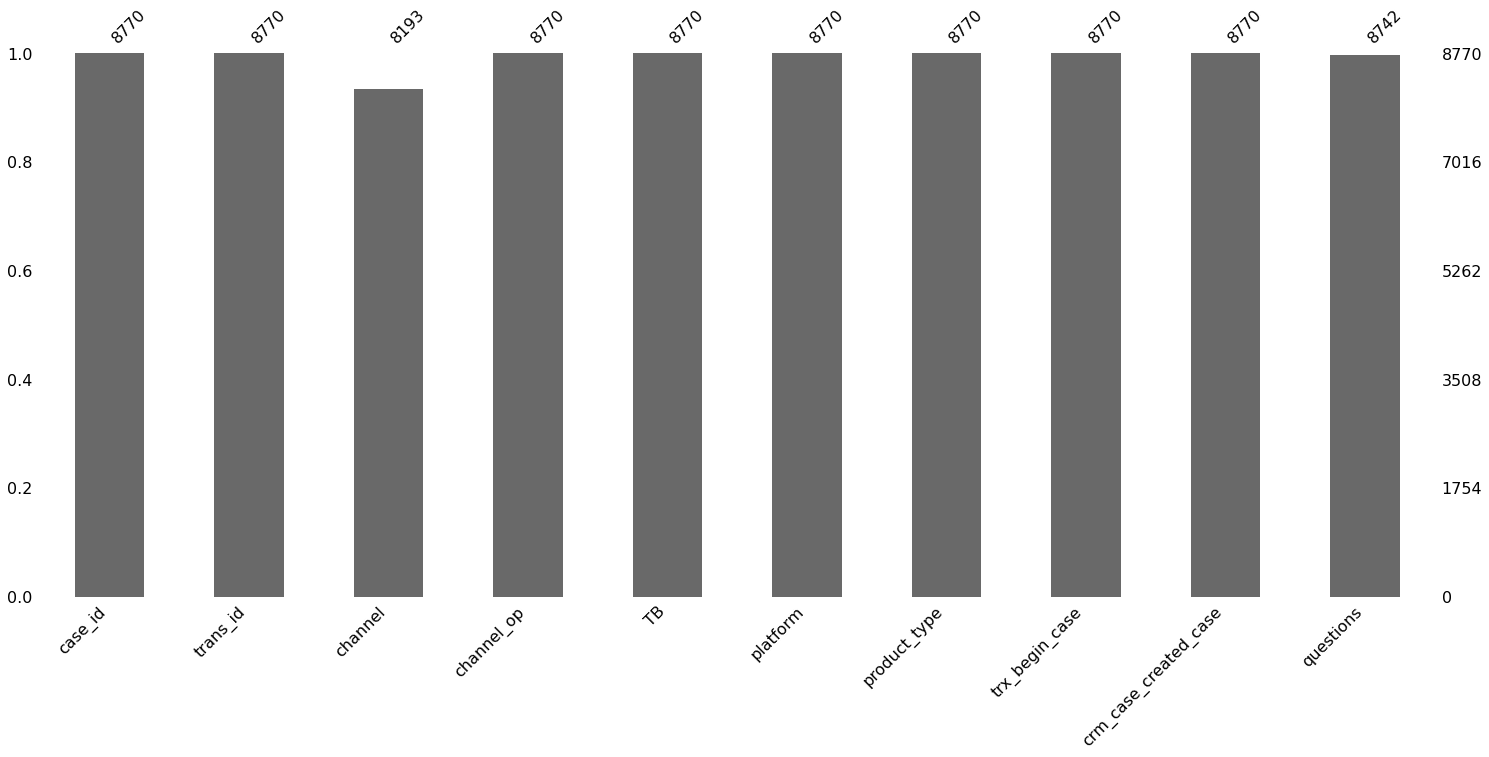

In [ ]:
msno.bar(df)

In [ ]:
df[df['channel'].isna()]['channel_op'].value_counts() 
#если канал куда было совершенно списание отсутсвует то заскамили с устройства самообслуживания(остальное выбросы)

Устройства самообслуживания    573
ТСТ или Токен                    3
СБОЛ                             1
Name: channel_op, dtype: int64

In [ ]:
df[df['questions'].isna()]['channel_op'].value_counts()

СБОЛ             18
Токен             5
ТСТ или Токен     3
Другое            2
Name: channel_op, dtype: int64

In [ ]:
df[df['questions'].isna()]

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions
2208,4400,4400001,Карта другого Банка,СБОЛ,5,МП,Банковская карта,2021-11-01 20:24:29,2021-11-01 21:02:27,NaN
2238,3100,3100001,Карта другого Банка,СБОЛ,5,МП,Банковская карта,2021-11-01 21:11:42,2021-11-01 21:46:31,NaN
2251,500,500001,Номер телефона,СБОЛ,5,МП,Банковская карта,2021-11-01 21:14:08,2021-11-01 22:17:18,NaN
2252,500,500002,Номер телефона,СБОЛ,5,МП,Банковская карта,2021-11-01 21:32:52,2021-11-01 22:17:18,NaN
2605,5000,5000001,Карта другого Банка,СБОЛ,5,МП,Банковская карта,2021-11-02 15:11:16,2021-11-02 15:42:08,NaN
3800,7400,7400001,NaN,ТСТ или Токен,2,Другое,Банковская карта,2021-11-02 19:50:35,2021-11-02 19:53:58,NaN
3842,3600,3600001,NaN,ТСТ или Токен,2,Другое,Банковская карта,2021-11-02 19:59:00,2021-11-02 20:05:22,NaN
3843,3600,3600002,NaN,ТСТ или Токен,2,Другое,Банковская карта,2021-11-02 20:00:43,2021-11-02 20:05:22,NaN
4636,3500,3500002,Карта другого Банка,СБОЛ,5,МП,Банковская карта,2021-11-03 00:27:33,2021-11-03 01:05:24,NaN
4637,3500,3500001,Карта другого Банка,СБОЛ,5,МП,Банковская карта,2021-11-03 00:19:55,2021-11-03 01:05:24,NaN


In [ ]:
df['questions']=df['questions'].fillna('НетДанных')

# EDA

In [ ]:
def plot_bar(columns):
    for column in columns:
        plt.figure(figsize = (19,8))
        plt.bar(df[column].value_counts().index,df[column].value_counts().values)
        plt.title(column)
        plt.show()

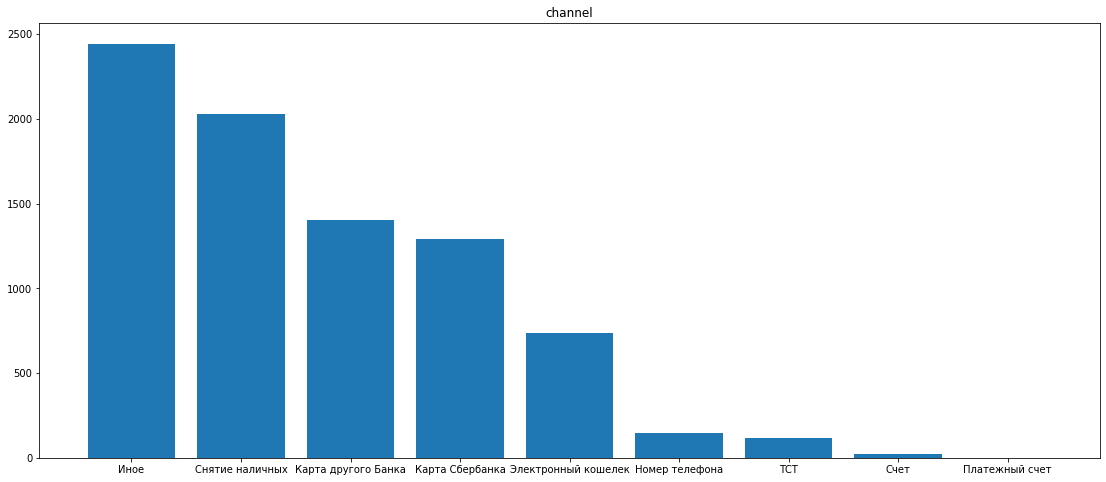

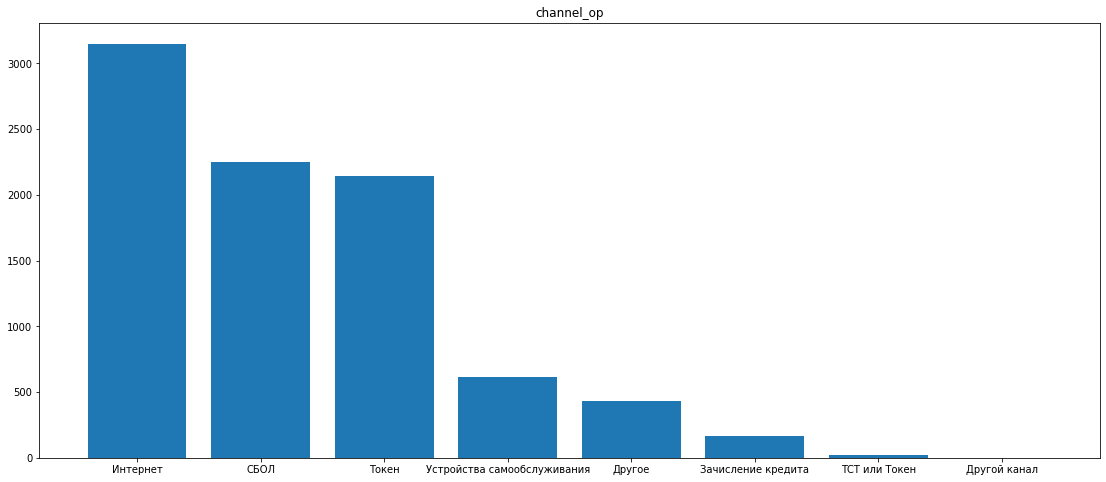

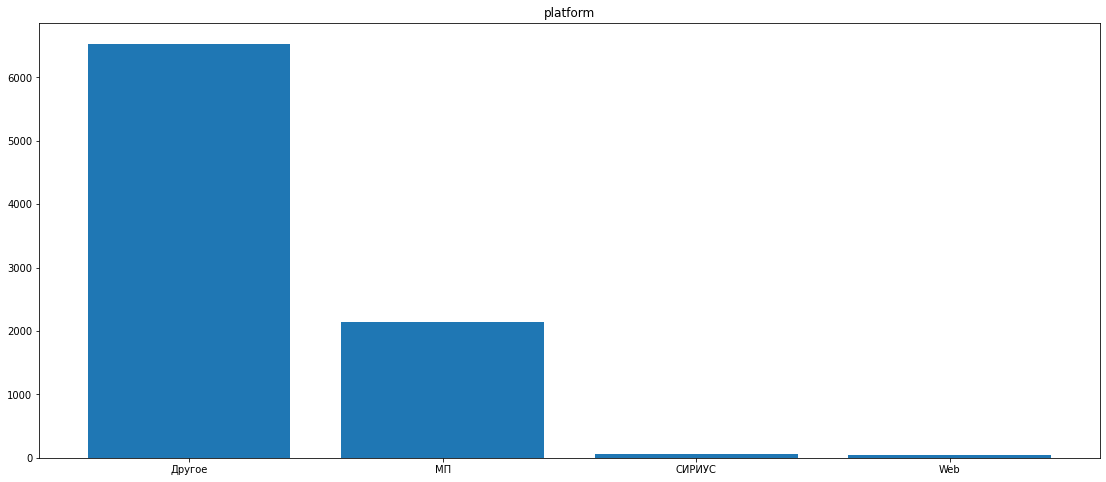

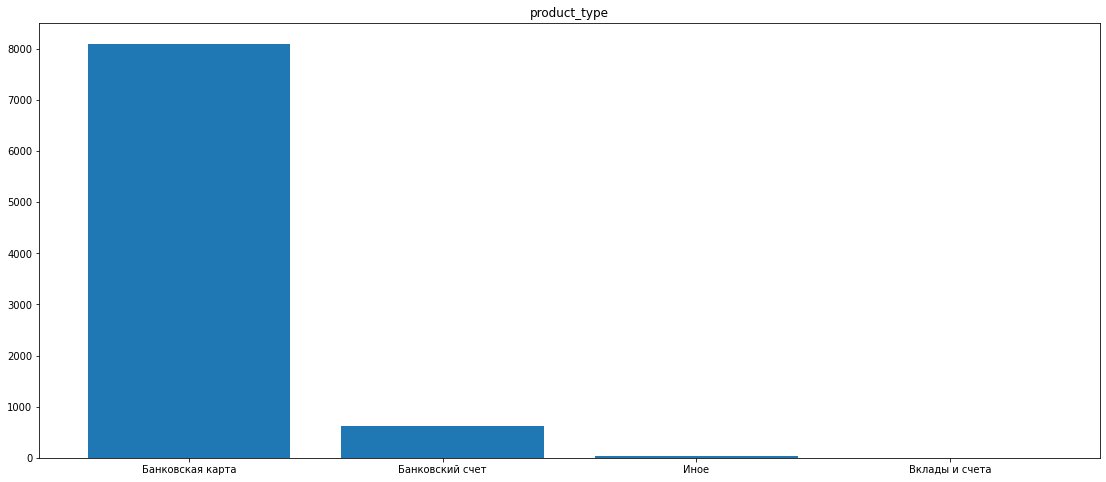

In [ ]:
plot_bar(['channel','channel_op','platform','product_type'])

In [ ]:
df['channel'].value_counts()

Иное                   2444
Снятие наличных        2026
Карта другого Банка    1405
Карта Сбербанка        1289
Электронный кошелек     738
Номер телефона          146
ТСТ                     119
Счет                     25
Платежный счет            1
Name: channel, dtype: int64

In [ ]:
df['case_id'].value_counts() #всего 100 случаев

6700    152
2500    149
5300    132
6900    126
7000    123
       ... 
7100     57
1300     54
8000     54
100      50
7900     43
Name: case_id, Length: 100, dtype: int64

In [ ]:
df[df['case_id'] == 9600].head(3)

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions
31,9600,9600001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:06:22,2021-11-01 01:13:06,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
175,9600,9600001,Карта другого Банка,СБОЛ,5,МП,Банковская карта,2021-11-01 00:10:57,2021-11-01 06:12:16,{u'СБОЛ. Схема мошенничества': u'Воспользовали...
182,9600,9600003,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 03:09:15,2021-11-01 06:31:33,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."


In [ ]:
df.groupby('case_id')['trx_begin_case'].max()-df.groupby('case_id')['trx_begin_case'].min() 
#у нас данные скама за 4-6 дня

case_id
0      5 days 10:26:55
100    4 days 11:35:29
200    5 days 09:17:20
300    5 days 01:29:02
400    5 days 17:25:27
             ...      
9500   5 days 07:10:44
9600   5 days 12:31:50
9700   5 days 09:53:32
9800   5 days 12:31:06
9900   5 days 18:59:42
Name: trx_begin_case, Length: 100, dtype: timedelta64[ns]

In [ ]:
df.groupby('case_id')['trx_begin_case'].describe(datetime_is_numeric = True)

,count,mean,min,25%,50%,75%,max
case_id,,,,,,,
0,89,2021-11-02 12:34:42.089887744,2021-11-01 00:16:30,2021-11-01 11:33:14.000000000,2021-11-02 12:58:21.000,2021-11-02 22:38:40.000000000,2021-11-06 10:43:25
100,50,2021-11-03 03:49:13.460000000,2021-11-01 05:41:07,2021-11-01 19:08:46.000000000,2021-11-03 02:54:39.500,2021-11-04 01:45:16.249999872,2021-11-05 17:16:36
200,92,2021-11-03 10:44:03.934782976,2021-11-01 04:34:52,2021-11-02 07:47:21.000000000,2021-11-03 04:43:30.500,2021-11-04 18:15:34.249999872,2021-11-06 13:52:12
300,98,2021-11-02 18:12:20.224489728,2021-11-01 02:03:54,2021-11-01 11:18:54.750000128,2021-11-02 14:19:57.000,2021-11-03 18:35:20.500000000,2021-11-06 03:32:56
400,83,2021-11-03 02:18:40.361445632,2021-11-01 00:04:10,2021-11-01 18:59:53.000000000,2021-11-02 18:48:40.000,2021-11-04 09:40:25.500000000,2021-11-06 17:29:37
...,...,...,...,...,...,...,...
9500,78,2021-11-03 10:29:44.410256640,2021-11-01 00:36:44,2021-11-02 14:38:14.249999872,2021-11-02 21:01:42.000,2021-11-04 13:13:04.500000000,2021-11-06 07:47:28
9600,80,2021-11-03 12:14:15.987500032,2021-11-01 00:10:57,2021-11-02 12:26:04.750000128,2021-11-02 21:51:04.500,2021-11-04 21:55:05.500000000,2021-11-06 12:42:47
9700,98,2021-11-03 01:19:43.602040832,2021-11-01 04:35:19,2021-11-01 12:16:58.500000000,2021-11-02 16:27:16.000,2021-11-04 04:11:54.500000000,2021-11-06 14:28:51


In [ ]:
df.groupby('case_id')['crm_case_created_case'].max()-df.groupby('case_id')['crm_case_created_case'].min()
#у нас данные ответов поддержки за за 5-7 дня

case_id
0      7 days 09:14:15
100    7 days 00:32:29
200    7 days 00:23:10
300    7 days 06:40:06
400    6 days 15:32:54
             ...      
9500   5 days 10:37:33
9600   7 days 15:06:34
9700   7 days 07:11:59
9800   7 days 08:00:13
9900   7 days 13:40:26
Name: crm_case_created_case, Length: 100, dtype: timedelta64[ns]

In [ ]:
df.groupby('case_id')['crm_case_created_case'].describe(datetime_is_numeric = True)

,count,mean,min,25%,50%,75%,max
case_id,,,,,,,
0,89,2021-11-02 23:01:21.853932544,2021-11-01 01:29:05,2021-11-01 15:23:49.000000000,2021-11-02 20:19:03.000,2021-11-03 16:36:45.000000000,2021-11-08 10:43:20
100,50,2021-11-03 09:55:47.939999744,2021-11-01 08:44:25,2021-11-01 22:05:53.750000128,2021-11-03 06:43:27.500,2021-11-04 11:00:24.000000000,2021-11-08 09:16:54
200,92,2021-11-03 19:04:39.923913216,2021-11-01 09:14:16,2021-11-02 16:46:47.500000000,2021-11-03 13:51:33.000,2021-11-05 01:07:40.500000000,2021-11-08 09:37:26
300,98,2021-11-03 00:17:23.387755008,2021-11-01 02:09:49,2021-11-01 13:53:02.249999872,2021-11-02 18:42:01.000,2021-11-03 21:46:59.750000128,2021-11-08 08:49:55
400,83,2021-11-03 14:07:11.289156352,2021-11-01 01:06:10,2021-11-02 17:32:26.000000000,2021-11-03 06:16:47.000,2021-11-04 16:43:33.500000000,2021-11-07 16:39:04
...,...,...,...,...,...,...,...
9500,78,2021-11-03 15:27:14.564102912,2021-11-01 01:01:01,2021-11-02 18:55:24.000000000,2021-11-03 13:35:21.000,2021-11-04 20:29:02.000000000,2021-11-06 11:38:34
9600,80,2021-11-03 21:40:44.100000000,2021-11-01 01:13:06,2021-11-02 17:37:55.000000000,2021-11-03 01:00:54.500,2021-11-05 05:35:41.500000000,2021-11-08 16:19:40
9700,98,2021-11-03 08:07:38.418367232,2021-11-01 08:50:47,2021-11-01 14:15:38.000000000,2021-11-02 19:34:21.000,2021-11-04 21:43:28.000000000,2021-11-08 16:02:46


# Data Cleaning

In [ ]:
df['questions'] = df['questions'].astype('str')
df

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,{u'ТСТ Причина совершения операции': u'Продает...
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
3,6100,6100002,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:00:57,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
4,6100,6100005,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:03:45,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
...,...,...,...,...,...,...,...,...,...,...
8765,5800,5800001,Иное,Другое,4,Другое,Банковская карта,2021-11-03 12:37:20,2021-11-08 15:50:50,{u'Другое Вы сообщали персональную информацию?...
8766,5800,5800002,Иное,Другое,4,Другое,Банковская карта,2021-11-03 12:42:12,2021-11-08 15:50:50,{u'Другое Вы сообщали персональную информацию?...
8767,3100,3100001,Карта Сбербанка,Зачисление кредита,4,Другое,Банковская карта,2021-11-06 13:34:58,2021-11-08 15:55:11,"{u'Тип мошенничества': u'FIN', u'Кредит Вердик..."
8768,9700,9700001,Иное,Другое,4,Другое,Банковская карта,2021-11-04 15:06:34,2021-11-08 16:02:46,{u'Другое Вы сообщали персональную информацию?...


In [ ]:
df['text_splitted'] = df['questions'].apply(lambda x:x.split(' '))
df['text_splitted']

0       [{u'ТСТ, Причина, совершения, операции':, u'Пр...
1       [{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...
2       [{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...
3       [{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...
4       [{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...
                              ...                        
8765    [{u'Другое, Вы, сообщали персональную, информа...
8766    [{u'Другое, Вы, сообщали персональную, информа...
8767    [{u'Тип, мошенничества':, u'FIN',, u'Кредит, В...
8768    [{u'Другое, Вы, сообщали персональную, информа...
8769    [{u'Тип, мошенничества':, u'FIN',, u'Кредит, В...
Name: text_splitted, Length: 8770, dtype: object

In [ ]:
words = []
for i in df['text_splitted']:
    for j in i:
        w = ''
        for k in j:
            if k not in "u:,'{}[]":
                w+=k
        words.append(w)
len(words),words[:10]

(374812,
 ['ТСТ',
  'Причина',
  'совершения',
  'операции',
  'Продает',
  'или',
  'покупает',
  'товар/услугу',
  'черезИнтернет',
  'ТСТ'])

In [ ]:
word_amount = Counter(words)
word_amount.most_common()[:15]

[('ТСТ', 22343),
 ('мошенничества', 17654),
 ('СБОЛ', 14078),
 ('0', 12590),
 ('Вы', 10728),
 ('с', 9910),
 ('3', 9674),
 ('или', 9582),
 ('Вердикт', 8920),
 ('Схема', 8918),
 ('Тип', 8736),
 ('FIN', 8734),
 ('Воспользовались', 8311),
 ('лица', 8311),
 ('без', 8311)]

In [ ]:
word_freq = np.array(list(word_amount.values()))
word_freq = word_freq / np.sum(word_freq) #вероятности слов
np.max(word_freq),list(word_amount.keys())[np.argmax(word_freq)]
word_prob = dict(zip(word_amount.keys(),word_freq)) # dict[word] = values , словарь слово -> вероятность

In [ ]:
df

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions,text_splitted
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,{u'ТСТ Причина совершения операции': u'Продает...,"[{u'ТСТ, Причина, совершения, операции':, u'Пр..."
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд..."
3,6100,6100002,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:00:57,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд..."
4,6100,6100005,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:03:45,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд..."
...,...,...,...,...,...,...,...,...,...,...,...
8765,5800,5800001,Иное,Другое,4,Другое,Банковская карта,2021-11-03 12:37:20,2021-11-08 15:50:50,{u'Другое Вы сообщали персональную информацию?...,"[{u'Другое, Вы, сообщали персональную, информа..."
8766,5800,5800002,Иное,Другое,4,Другое,Банковская карта,2021-11-03 12:42:12,2021-11-08 15:50:50,{u'Другое Вы сообщали персональную информацию?...,"[{u'Другое, Вы, сообщали персональную, информа..."
8767,3100,3100001,Карта Сбербанка,Зачисление кредита,4,Другое,Банковская карта,2021-11-06 13:34:58,2021-11-08 15:55:11,"{u'Тип мошенничества': u'FIN', u'Кредит Вердик...","[{u'Тип, мошенничества':, u'FIN',, u'Кредит, В..."
8768,9700,9700001,Иное,Другое,4,Другое,Банковская карта,2021-11-04 15:06:34,2021-11-08 16:02:46,{u'Другое Вы сообщали персональную информацию?...,"[{u'Другое, Вы, сообщали персональную, информа..."


# Feature Engineering

In [ ]:
df['time_to_react'] = df['crm_case_created_case']-df['trx_begin_case']
df

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions,text_splitted,time_to_react
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,{u'ТСТ Причина совершения операции': u'Продает...,"[{u'ТСТ, Причина, совершения, операции':, u'Пр...",-1 days +15:05:06
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:38:54
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:33:39
3,6100,6100002,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:00:57,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:37:50
4,6100,6100005,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:03:45,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:35:02
...,...,...,...,...,...,...,...,...,...,...,...,...
8765,5800,5800001,Иное,Другое,4,Другое,Банковская карта,2021-11-03 12:37:20,2021-11-08 15:50:50,{u'Другое Вы сообщали персональную информацию?...,"[{u'Другое, Вы, сообщали персональную, информа...",5 days 03:13:30
8766,5800,5800002,Иное,Другое,4,Другое,Банковская карта,2021-11-03 12:42:12,2021-11-08 15:50:50,{u'Другое Вы сообщали персональную информацию?...,"[{u'Другое, Вы, сообщали персональную, информа...",5 days 03:08:38
8767,3100,3100001,Карта Сбербанка,Зачисление кредита,4,Другое,Банковская карта,2021-11-06 13:34:58,2021-11-08 15:55:11,"{u'Тип мошенничества': u'FIN', u'Кредит Вердик...","[{u'Тип, мошенничества':, u'FIN',, u'Кредит, В...",2 days 02:20:13
8768,9700,9700001,Иное,Другое,4,Другое,Банковская карта,2021-11-04 15:06:34,2021-11-08 16:02:46,{u'Другое Вы сообщали персональную информацию?...,"[{u'Другое, Вы, сообщали персональную, информа...",4 days 00:56:12


In [ ]:
df.groupby('case_id')['time_to_react'].mean() #  в среднем поддержка реагирует за 4 часа

case_id
0      0 days 10:26:39.764044943
100       0 days 06:06:34.480000
200    0 days 08:20:35.989130434
300    0 days 06:05:03.163265306
400    0 days 11:48:30.927710843
                  ...           
9500   0 days 04:57:30.153846153
9600      0 days 09:26:28.112500
9700   0 days 06:47:54.816326530
9800   0 days 13:41:09.044444444
9900      0 days 06:47:43.500000
Name: time_to_react, Length: 100, dtype: timedelta64[ns]

In [ ]:
df.groupby('case_id')['time_to_react'].describe()

,count,mean,std,min,25%,50%,75%,max
case_id,,,,,,,,
0,89,0 days 10:26:39.764044943,0 days 15:36:09.125112755,-1 days +19:44:28,0 days 01:38:37,0 days 04:09:28,0 days 13:47:37,3 days 22:07:47
100,50,0 days 06:06:34.480000,0 days 11:20:38.175673459,0 days 00:06:00,0 days 01:20:50,0 days 03:02:50,0 days 06:04:41.250000,2 days 19:22:51
200,92,0 days 08:20:35.989130434,0 days 21:53:03.139679420,-1 days +23:59:11,0 days 00:23:09,0 days 02:10:29,0 days 07:37:49.250000,6 days 21:58:08
300,98,0 days 06:05:03.163265306,0 days 09:42:37.349858768,0 days 00:03:38,0 days 00:25:47.250000,0 days 02:44:19,0 days 05:06:40,2 days 09:41:53
400,83,0 days 11:48:30.927710843,0 days 21:32:53.150675045,-1 days +23:58:36,0 days 00:45:35,0 days 03:48:08,0 days 16:05:52.500000,6 days 01:27:14
...,...,...,...,...,...,...,...,...
9500,78,0 days 04:57:30.153846153,0 days 06:50:33.794917834,-1 days +20:52:13,0 days 00:35:15.750000,0 days 03:18:35,0 days 05:04:40.250000,1 days 04:58:22
9600,80,0 days 09:26:28.112500,0 days 16:02:48.859013935,-1 days +22:12:14,0 days 00:25:06,0 days 01:35:43,0 days 07:55:32,3 days 08:08:20
9700,98,0 days 06:47:54.816326530,0 days 12:48:40.545116937,-1 days +22:07:24,0 days 00:28:54.250000,0 days 03:14:07,0 days 05:32:10.500000,4 days 00:56:12


In [ ]:
def split_text(text: str) -> List[str]:
    array = []
    text_split = text.split('u')[1:]
    for i in range(0,len(text_split),2):
        array.append(text_split[i:i+2])
    return array

In [ ]:
split_text(df['questions'][0])

[["'ТСТ Причина совершения операции': ",
  "'Продает или покупает товар/услугу черезИнтернет', "],
 ["'ТСТ Вы совершили данную операцию самостоятельно?': ", "'1', "],
 ["'Тип мошенничества': ", "'FIN', "],
 ["'ТСТ Вердикт': ", "'Товар/услугу не получил, обман', "],
 ["'ТСТ Схема мошенничества': ", "'Сам перевел'}"]]

In [ ]:
df['text_parsed'] = df['questions'].apply(split_text) #text_parsed содержит массив,[axis = 0 вопросы;axis = 1 ответы]
df.head(3)

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions,text_splitted,time_to_react,text_parsed
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,{u'ТСТ Причина совершения операции': u'Продает...,"[{u'ТСТ, Причина, совершения, операции':, u'Пр...",-1 days +15:05:06,"[['ТСТ Причина совершения операции': , 'Продае..."
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:38:54,"[['Тип мошенничества': , 'FIN', ], ['ТСТ Верди..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:33:39,"[['Тип мошенничества': , 'FIN', ], ['ТСТ Верди..."


In [ ]:
df.head(3)

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions,text_splitted,time_to_react,text_parsed
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,{u'ТСТ Причина совершения операции': u'Продает...,"[{u'ТСТ, Причина, совершения, операции':, u'Пр...",-1 days +15:05:06,"[['ТСТ Причина совершения операции': , 'Продае..."
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:38:54,"[['Тип мошенничества': , 'FIN', ], ['ТСТ Верди..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[{u'Тип, мошенничества':, u'FIN',, u'ТСТ, Верд...",-1 days +20:33:39,"[['Тип мошенничества': , 'FIN', ], ['ТСТ Верди..."
